In [1]:
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
from os import path

from deployment_instance import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_data_exfiltration_times, percent_of_data_exfiltrated

In [2]:
equifax_baseline_data = ingest_experiment_results(path.join('data', 'EquifaxBaseline_v2'))

simple_deception = ingest_experiment_results(path.join('data', 'Equifax_StaticRandomDefender_creds'))

honeycred_deception = ingest_experiment_results(path.join('data', 'Equifax_StaticRandomDefender_v1'))

In [3]:
baseline_exfiltration_times = get_data_exfiltration_times(equifax_baseline_data)
simple_deception_exfiltration_times = get_data_exfiltration_times(simple_deception)
honeycred_deception_exfiltration_times = get_data_exfiltration_times(honeycred_deception)

In [4]:
# Percent of experiments all data exfiltrated
baseline_exfiltration_percent = percent_of_data_exfiltrated(equifax_baseline_data)
simple_deception_exfiltration_percent = percent_of_data_exfiltrated(simple_deception)
honeycred_deception_exfiltration_percent = percent_of_data_exfiltrated(honeycred_deception)

print(f'Baseline: {baseline_exfiltration_percent}')
print(f'Simple Deception: {simple_deception_exfiltration_percent}')
print(f'HoneyCred Deception: {honeycred_deception_exfiltration_percent}')

Baseline: 100.0
Simple Deception: 100.0
HoneyCred Deception: 40.0


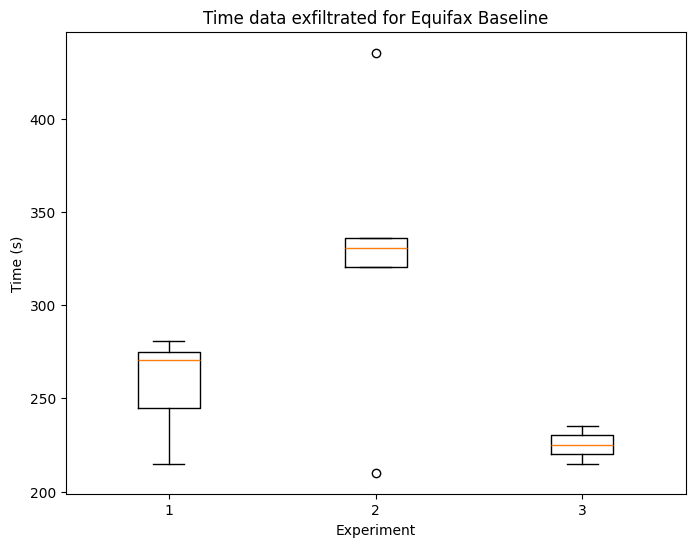

In [5]:
# Box plot comparing data exfiltration times
plt.figure(figsize=(8, 6))
plt.boxplot([baseline_exfiltration_times, simple_deception_exfiltration_times, honeycred_deception_exfiltration_times])
plt.ylabel('Time (s)')
plt.xlabel('Experiment')
plt.title('Time data exfiltrated for Equifax Baseline')
plt.show()